In [1]:
using StatisticalRethinking

┌ Warning: Environment variable CMDSTAN_HOME not set. Use set_cmdstan_home!.
└ @ StanBase /Users/haroontaylor/.julia/packages/StanBase/DeBcW/src/StanBase.jl:73


## Chapter 2: Small Worlds and Large Worlds answers

### 2E1:
2. Pr(rain|Monday)
4. Pr(rain, Monday) / Pr(Monday) = (Pr(rain|Monday) * Pr(Monday)) / Pr(Monday) = Pr(rain|Monday)

### 2E2:
3. The probability that it is Monday, given that it is raining

### 2E3: 
1. Pr(Monday|rain)
4. Pr(rain|Monday)Pr(Monday)/Pr(rain) = Pr(rain, Monday)/Pr(rain) = Pr(Monday|rain) $\;\;\;\;\;\;\;\;\;\;\;\;$ _by Bayes Theorem_

### 2E4
_Theoretical discussion question_


### 2M1

In [2]:
function plot_grid_approx(n_points, n_water, n_tosses, prior, title)
    p_grid = range(0, stop=1, length=n_points)
    likelihood = [pdf(Binomial(n_tosses, p), n_water) for p in p_grid]
    unstd_posterior = likelihood.*prior
    posterior = unstd_posterior./sum(unstd_posterior)
    p1 = plot(p_grid, posterior, xlab="probability of water", ylab="posterior probability", title=title, legend=false)
    p2 = scatter!(p1, p_grid , posterior, legend=false)
end;

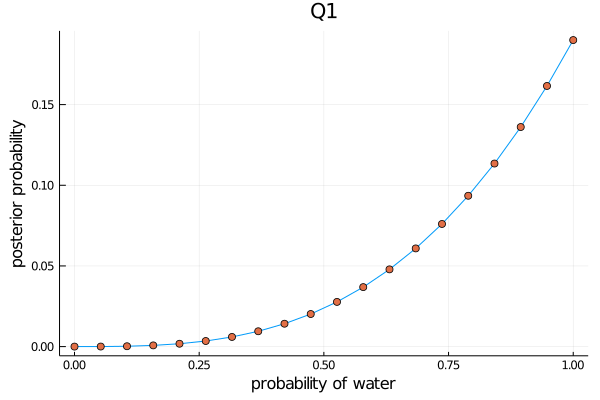

In [3]:
# Set plotting backend
gr()
N = 20
UNIFORM_PRIOR = ones(20)
plot_grid_approx(N, 3, 3, UNIFORM_PRIOR, "Q1")

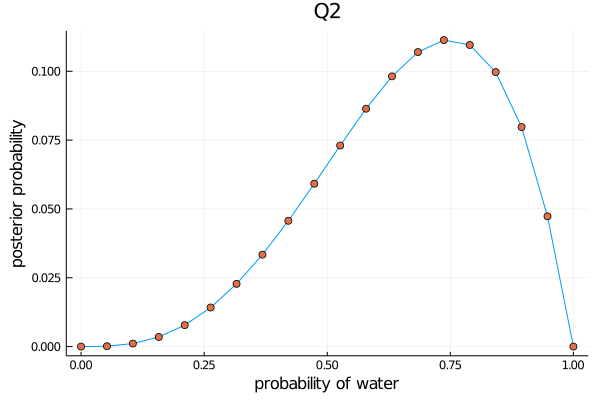

In [4]:
plot_grid_approx(N, 3, 4, UNIFORM_PRIOR, "Q2")

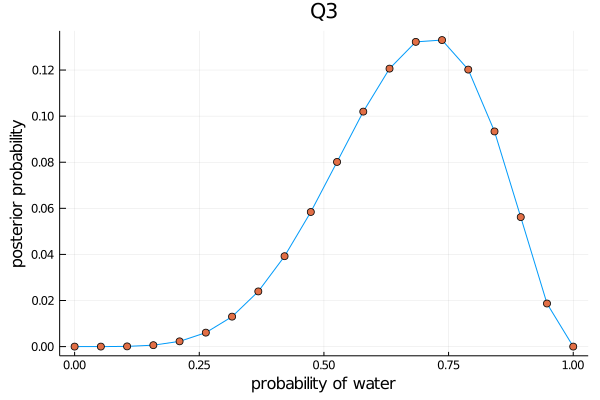

In [5]:
plot_grid_approx(N, 5, 7, UNIFORM_PRIOR, "Q3")

### 2M2

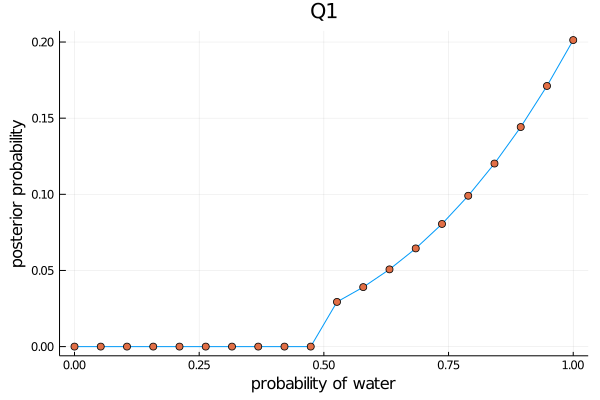

In [6]:
SEMI_UNIFORM_PRIOR = [p < 0.5 ? 0 : 1 for p in range(0, stop=1, length=N)]
plot_grid_approx(N, 3, 3, SEMI_UNIFORM_PRIOR, "Q1")

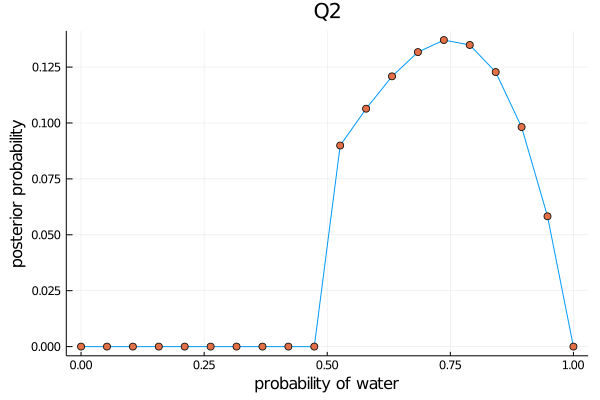

In [7]:
plot_grid_approx(N, 3, 4, SEMI_UNIFORM_PRIOR, "Q2")

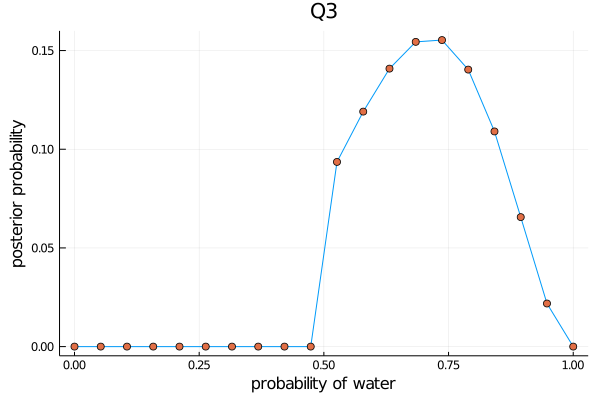

In [8]:
plot_grid_approx(N, 5, 7, SEMI_UNIFORM_PRIOR, "Q3")

### 2M3

In [9]:
# Define known information
P_Earth = 0.5
P_Mars = 0.5
P_land_given_Earth = 1 - 0.7
P_land_given_Mars = 1

P_land = P_land_given_Earth * P_Earth + P_land_given_Mars * P_Mars

# By Bayes Theorem
P_Earth_given_land = (P_land_given_Earth * P_Earth) / P_land

print(round(P_Earth_given_land, digits=5))

0.23077

### 2M4

In [10]:
cards = ["BB", "BW", "WW"]
counts = [count(i -> (i=='B'), card) for card in cards]
p = counts/sum(counts)
print(round(sum(p[findall(x -> x == "BB", cards)]), digits=5))

0.66667

### 2M5

In [11]:
cards = append!(cards, ["BB"])
counts = [count(i -> (i=='B'), card) for card in cards]
p = counts/sum(counts)
print(round(sum(p[findall(x -> x == "BB", cards)]), digits=5))

0.8

### 2M6

In [12]:
cards = ["BB", "BW", "WW"]
counts = [count(i -> (i=='B'), card) for card in cards]
prior = [1, 2, 3]
likelihood = counts.*prior
p = likelihood/sum(likelihood)
print(round(sum(p[findall(x -> x == "BB", cards)]), digits=5))

0.5

### 2M7

In [13]:
counts = [6, 2, 0]
p = counts/sum(counts)
print(round(sum(p[findall(x -> x == "BB", cards)]), digits=5))

0.75

### 2H1

In [14]:
# Define known information
P_A1 = 0.5
P_B1 = 0.5
P_twins_given_A = 0.1
P_twins_given_B = 0.2

# Calculate probability of twins
P_twins = P_A1 * P_twins_given_A + P_B1 * P_twins_given_B

# Update P_A and P_B based on the fact that the first birth was twins (by Bayes Theorem)
P_A2 = (P_twins_given_A * P_A1) / P_twins
P_B2 = 1 - P_A2

# Calculate update probability of twins
P_twins = P_A2 * P_twins_given_A + P_B2 * P_twins_given_B
print(round(P_twins, digits=5))

0.16667

### 2H2

In [15]:
# As calculated above
print(round(P_A2, digits=5))

0.33333

### 2H3

In [16]:
P_single_given_A = 1 - P_twins_given_A
P_single_given_B = 1 - P_twins_given_B
P_single = 1 - P_twins

P_A3 = (P_single_given_A * P_A2 / P_single)
P_B3 = 1 - P_A3

print(round(P_A3, digits=5))

0.36

### 2H4

In [17]:
# New information from test
P_correct_given_A = 0.8
P_correct_given_B = 0.65

# Using only test information
P_correct = P_A1 * P_correct_given_A + P_B1 * P_correct_given_B
P_A_given_correct = (P_correct_given_A * P_A1) / P_correct
println(round(P_A_given_correct, digits=5))

# Combinining test and birth information
P_correct = P_A3 * P_correct_given_A + P_B3 * P_correct_given_B
P_A_given_correct = (P_correct_given_A * P_A3) / P_correct
println(round(P_A_given_correct, digits=5))

0.55172
0.40909
